# Automobile project

In the following project I will perform a guided exploratory data analysis (EDA). The purpose of this project is to practice the knowledge adquired in my python courses about data analysis.

The original EDA was made it by Nimit Vanawat on August 12, 2021 (https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). In Nimit's project a brief introduction about the exploratory data analysis is given (definition and importance of the EDA to take insights from the data), as well as the application of EDA to a real problem 

In order to perform the data, Nimit used the Automobile dataset taken from kaggle https://www.kaggle.com/toramky/automobile-dataset. This dataset consist of data From 1985 Ward's Automotive Yearbook. According to kaggle description of the dataset "consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars."

ALTHOUGH I FOLLOWED THE NIMIT'S PROCEDURE, MOST OF THE CODE WAS DONE BY ME.

# Cleaning Data 

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
auto = pd.read_csv('automobile_data.csv')

In [3]:
#Brief exploration of data
print(auto.head())
print(auto.shape)

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

From the table above we notice the dataset is made of 26 columns. In the "normalized-losses" attribute there are some "?", wich represent missing values

In [4]:
#Searching the unique values for each column
for column in auto:
        print('Unique values -', column, '- :', auto[column].unique())

Unique values - symboling - : [ 3  1  2  0 -1 -2]
Unique values - normalized-losses - : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
Unique values - make - : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Unique values - fuel-type - : ['gas' 'diesel']
Unique values - aspiration - : ['std' 'turbo']
Unique values - num-of-doors - : ['two' 'four' '?']
Unique values - body-style - : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values - drive-wheels - : ['rwd' 'fwd' '4wd']
Unique values - engine-location - : ['front' 'rear']
Unique values - wheel-base - :

With the last searching we can find the unique values in order to understand the meaning of each column. We also notice the columns that have missing values in the form of "?".

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

From the .info() method we can see the total non-null values and the data types of the columns. In the previous code we saw the missing values are in the form of "?", that is the reason of why there are no missing values in the .info() method; so, we need to change "?" symbol into np.nan. We also have to take a look at the data types.

## Handling missing values 

In [6]:
#Total missing values 
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

With .isnull() method we can search the total missing values for the columns. However, as we can se, there are no missing values, all of them are in the form of '?'. So, we need to replace '?' into np.nan values.

In [7]:
#Checking for number of '?' in each column
auto[auto.columns].isin(['?']).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
for column in auto:
    auto[column].replace('?', np.nan, inplace = True)

In [9]:
#Total missing values after replace
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

The number of missing values correspond to the number of '?' for each column, so, the .replace() method was successful.

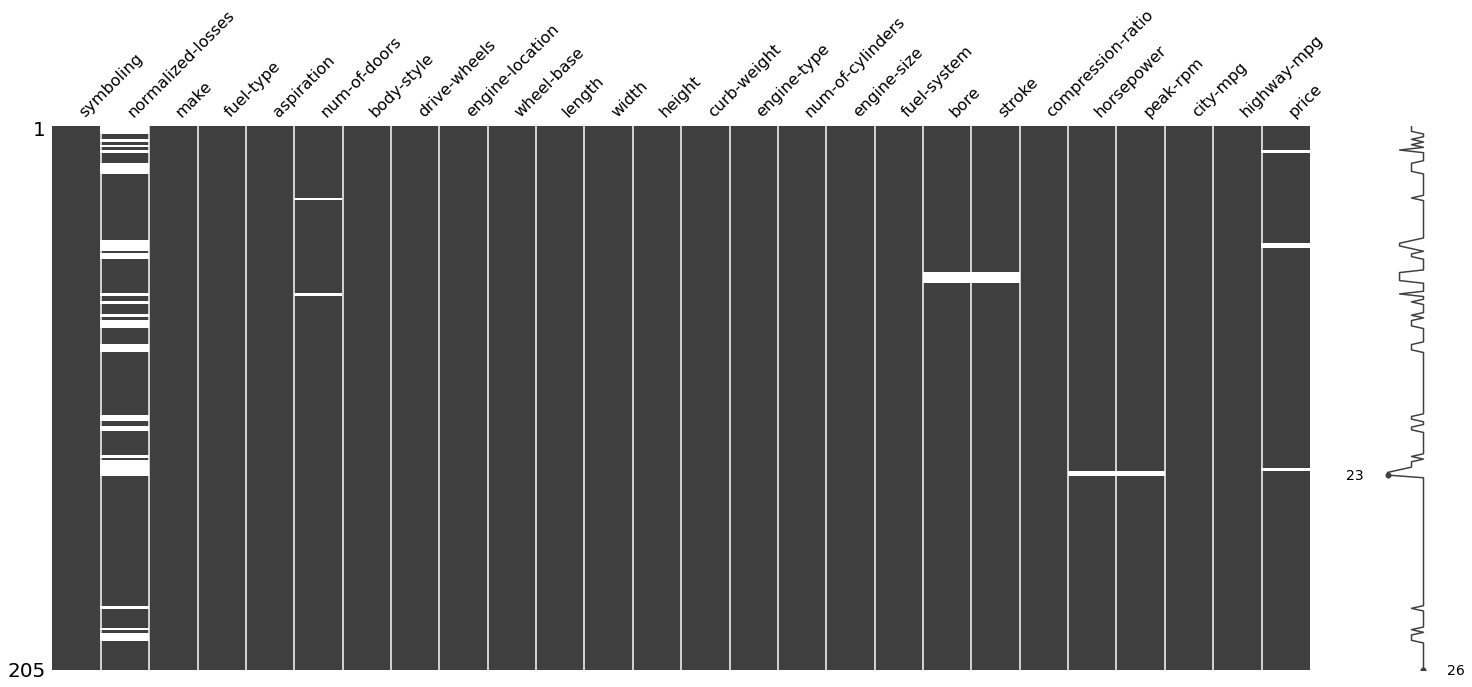

In [12]:
#Visualizing the missing values graphifcally using missingno package
import missingno as msno
msno.matrix(auto)
plt.show()

We see there are a lot of missing values in the "normalized-losses" column. In some cases it is better to drop the rows with missing values, however for this case we can't drop them because the total rows of the data set is 205; so,  41 missing values for that column is a significant number. 

In [13]:
 #Replacing missing values with mean/dropping missing values for "num-of-doors" column
col = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
    
for column in col:
    auto[column] = auto[column].astype('float')
    auto[column].fillna(auto[column].mean(), inplace = True)
    
auto.dropna(subset = ['num-of-doors'], inplace = True)

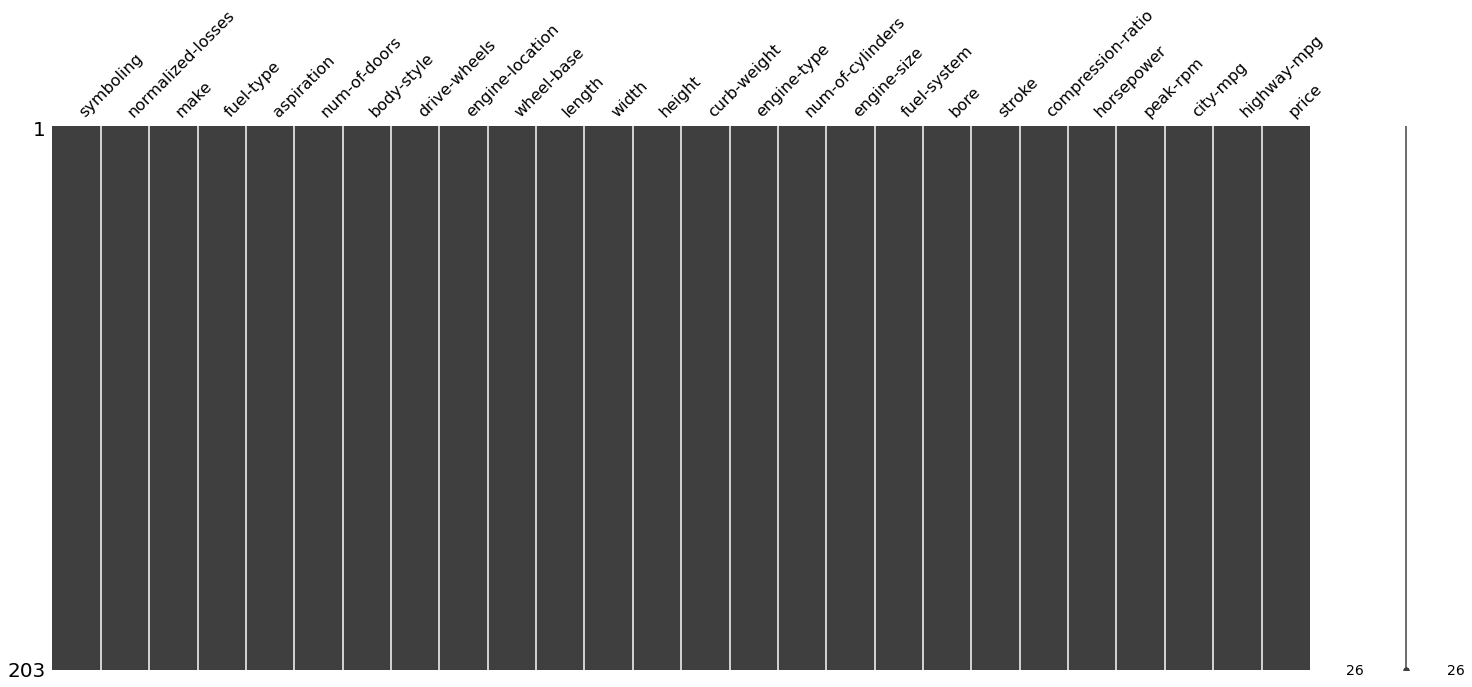

In [14]:
msno.matrix(auto)
plt.show()

In [15]:
#Checking for right data types
print(auto.head())
print(auto.info())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

# Exploring Data 

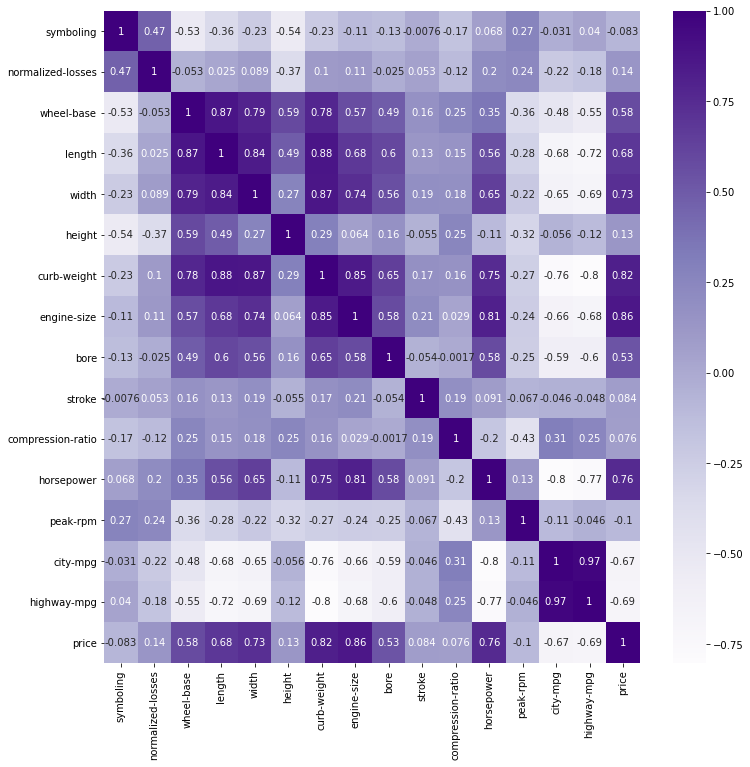

In [29]:
#Checking correlation between different variables
plt.figure(figsize=(12,12))
sns.heatmap(auto.corr(),cbar=True,annot=True,cmap='Purples')
plt.show()

The correlation coefficients for some interesting features.

STRONG POSITIVE CORRELATION:

- curb-weight vs. wheel-base, length, width, engine-size, bore, horse-power, price
- engine-size vs. wheel-base, length, width, curb-weigth, bore, horsepower, price
- horsepower vs. length, width, curb-weigth, engine-size, bore, price
- price vs. wheel-base, length, width, curb-weigth, engine-size, bore, horsepower

STRONG NEGATIVE CORRELATION:

- city-mpg vs. length, width, curb-weight, engine-size, bore, horsepower, price
- highway-mpg vs. wheel-base, length, width, curb-weight, engine-size, bore, horsepower, price
- price vs. city-mpg, highway-mpg

We can start our analysis looking at the relations of how the other features affect the price.

## How does the curb weigth affect the price (two and four doors)?

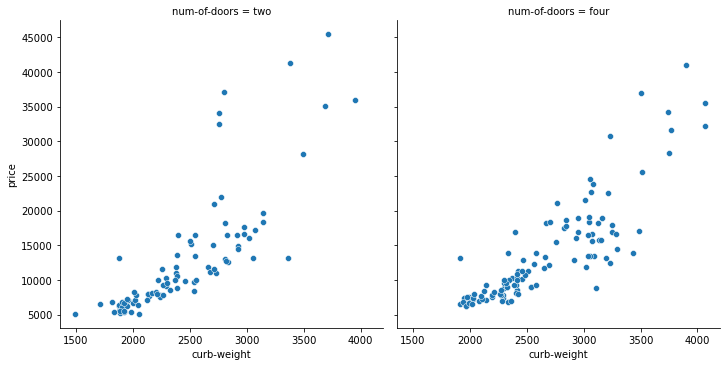

In [41]:
sns.relplot(x= 'curb-weight', y = 'price', kind = 'scatter', col = 'num-of-doors', data = auto)
plt.ylabel('price')
plt.xlabel('curb-weight')
plt.show()

In this plot we can see most of the car's prices are between 5000 and 2500, with a range of curb weight of 1700 and 3500. This relation shows us the price tends to increase as the curb weight increases too. We can also notice there is no much difference in the number of doors

## How does the horsepower affect the price (two and four doors)? 

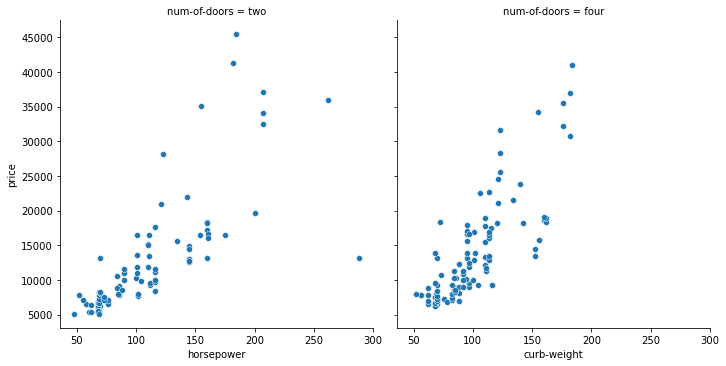

In [40]:
sns.relplot(x= 'horsepower', y = 'price', kind = 'scatter', col = 'num-of-doors', data = auto)
plt.ylabel('price')
plt.xlabel('curb-weight')
plt.show()

## How does the price vary with the number of doors?

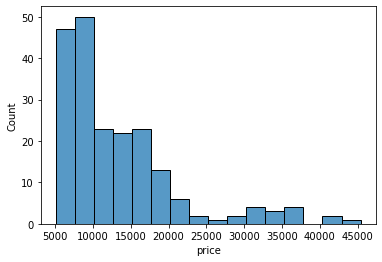

In [56]:
sns.histplot(auto['price'], bins = 16)
plt.show()

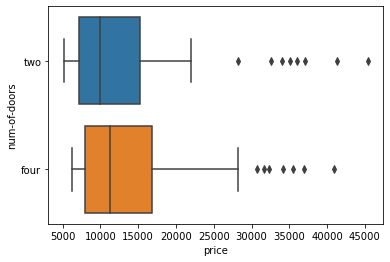

In [58]:
sns.boxplot(x = 'price', y = 'num-of-doors', data = auto)
plt.show()

With the last two plots we can see the price of the cars lies between 7000 and 17000. The average price for cars with two doors is 10000, while the average for cars with four doors is 12000.